<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Population-Regression-Line" data-toc-modified-id="Population-Regression-Line-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Population Regression Line</a></span><ul class="toc-item"><li><span><a href="#Simulate-error-term" data-toc-modified-id="Simulate-error-term-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Simulate error term</a></span></li><li><span><a href="#Simulate-X-values" data-toc-modified-id="Simulate-X-values-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Simulate X values</a></span></li><li><span><a href="#Generate-Y-values-and-plot-the-population-regression-line" data-toc-modified-id="Generate-Y-values-and-plot-the-population-regression-line-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Generate Y values and plot the population regression line</a></span></li></ul></li><li><span><a href="#Build-a-least-squares-line-using-the-above-dataset" data-toc-modified-id="Build-a-least-squares-line-using-the-above-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Build a least squares line using the above dataset</a></span></li><li><span><a href="#Plotting-RSS--Residual-Sum-of-Squares" data-toc-modified-id="Plotting-RSS--Residual-Sum-of-Squares-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plotting RSS- Residual Sum of Squares</a></span></li><li><span><a href="#Learning-point" data-toc-modified-id="Learning-point-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Learning point</a></span></li><li><span><a href="#Building-Least-Squares-Line-using-multiple-samples" data-toc-modified-id="Building-Least-Squares-Line-using-multiple-samples-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Building Least Squares Line using multiple samples</a></span></li></ul></div>

In [226]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Population Regression Line

Population Regression line is best linear approximation of the true linear relationship between X and Y.

Let us assume the relationship between 2 linearly dependent variables  is defined by Y = a + b*X + E

### Simulate error term

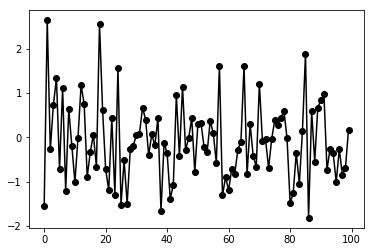

In [227]:
sample_size = 100
E = np.random.standard_normal(size = sample_size)
plt.plot(E, '-ok')

In [228]:
np.mean(E)

-0.10021012537258533

### Simulate X values

In [229]:
X = np.random.ranf(sample_size)*2

### Generate Y values and plot the population regression line

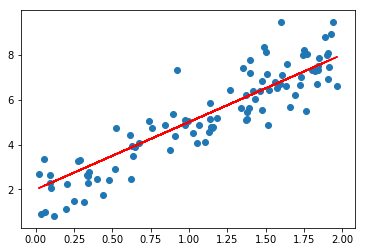

In [230]:
a = 2
b = 3 
Y = a + b*X + E
plt.plot(X, (a + b*X), '-r')
plt.scatter(X, Y)

## Build a least squares line using the above dataset

In [231]:
regr = linear_model.LinearRegression()
X = X.reshape(-1, 1)
regr.fit(X, Y)
y_hat = regr.predict(X)
residuals = Y - y_hat

In [232]:
b_hat = regr.coef_[0]
a_hat = regr.intercept_
print(b_hat, a_hat)

3.2957339577255684 1.5692097677914596


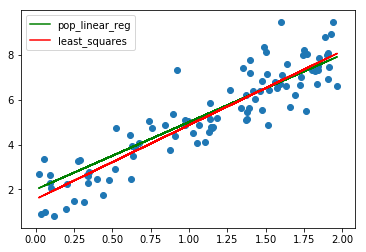

In [233]:
plt.plot(X, (a + b*X), '-g',label ='pop_linear_reg')
plt.scatter(X, Y)
plt.plot(X, (a_hat + b_hat*X), '-r', label = 'least_squares')
plt.legend(loc='upper left')

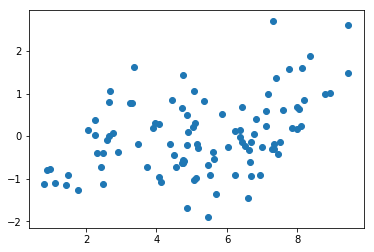

In [234]:
plt.scatter(Y, residuals)
np.mean(residuals)
rss_ex1 = np.sum(np.square(Y - (a_hat + b_hat*X)))

## Plotting RSS- Residual Sum of Squares

Now for different values of a_hat and b_hat let us visualize the RSS distribution

45301.489802143056 82889.02027803482


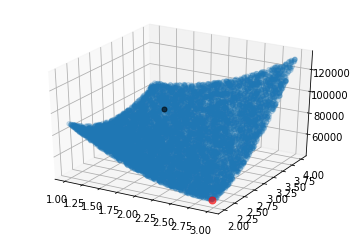

In [235]:
rss_master = []
samples = 10000
a_hat_space = np.linspace(1,3,samples)
b_hat_space = np.linspace(2,4,samples)
np.random.shuffle(a_hat_space)
np.random.shuffle(b_hat_space)
coeffs = zip(a_hat_space, b_hat_space)
rss_min = 0.0
a_hat_min = np.nan
b_hat_min = np.nan
for a, b in coeffs:
    rss = np.sum(np.square(Y - (a + b*X + E)))
    if rss_min == 0.0:
        a_hat_min = a
        b_hat_min = b
        rss_min = rss
    elif rss < rss_min:
        a_hat_min = a
        b_hat_min = b
        rss_min = rss
    rss_master = np.append(rss_master, rss)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Axes3D.scatter(ax, xs = a_hat_space, ys = b_hat_space, zs = rss_master, alpha =0.2)
ax.plot([a_hat], [b_hat], [rss_ex1], markerfacecolor='k', markeredgecolor='k', marker='o', markersize=5, alpha=0.6)
ax.plot([a_hat_min], [b_hat_min], [rss_min], markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7, alpha=0.6)
print(rss_min, rss_ex1)

## Learning point
1. Even though we are using the data generated by the population regression line our least squares line is not the same as the population regression line because we are using only one sample of data to estimate the coefficients.
2. Also remember that the least squares line is generated by using the observed data.
2. If we use multiple samples and generate the coefficients and take the mean of those coefficients then our coefficient estimates would be very very close to the population parameters
3. This process is analogus to the concept of estimating the population mean from sample mean

## Building Least Squares Line using multiple samples

Sample  0 0.4984572391187667 4.104810292517032
Sample  1 1.3145347293313145 3.256916915559723
Sample  2 1.3378349355942367 3.4782675056504924
Sample  3 1.1274662499142796 3.5374098568620798
Sample  4 0.9406409050643036 3.804394035684867
Sample  5 1.0590204350333026 3.392891597325557
Sample  6 1.3397790284959754 3.560704262481119
Sample  7 1.6674022955456698 3.203395618633156
Sample  8 0.9668388084988861 3.5802101097783274
Sample  9 1.4042090705128047 3.2477664922436142
Sample  10 1.7543050798958757 3.0922195062310043
Sample  11 0.9791848353619659 3.56045280083601
Sample  12 1.4352451815351124 3.444397884619144
Sample  13 0.9546238335814992 3.679851387759912
Sample  14 1.4859553403126355 3.3150296382629496
Sample  15 1.5554075228938347 3.2982910829364713
Sample  16 0.9225123178253267 3.7991084214863
Sample  17 1.3606942120589363 3.4669775126946383
Sample  18 1.4073875596841057 3.284389129947131
Sample  19 1.0507567782431577 3.424789947412208
1.2281128179250995 3.476613699946087


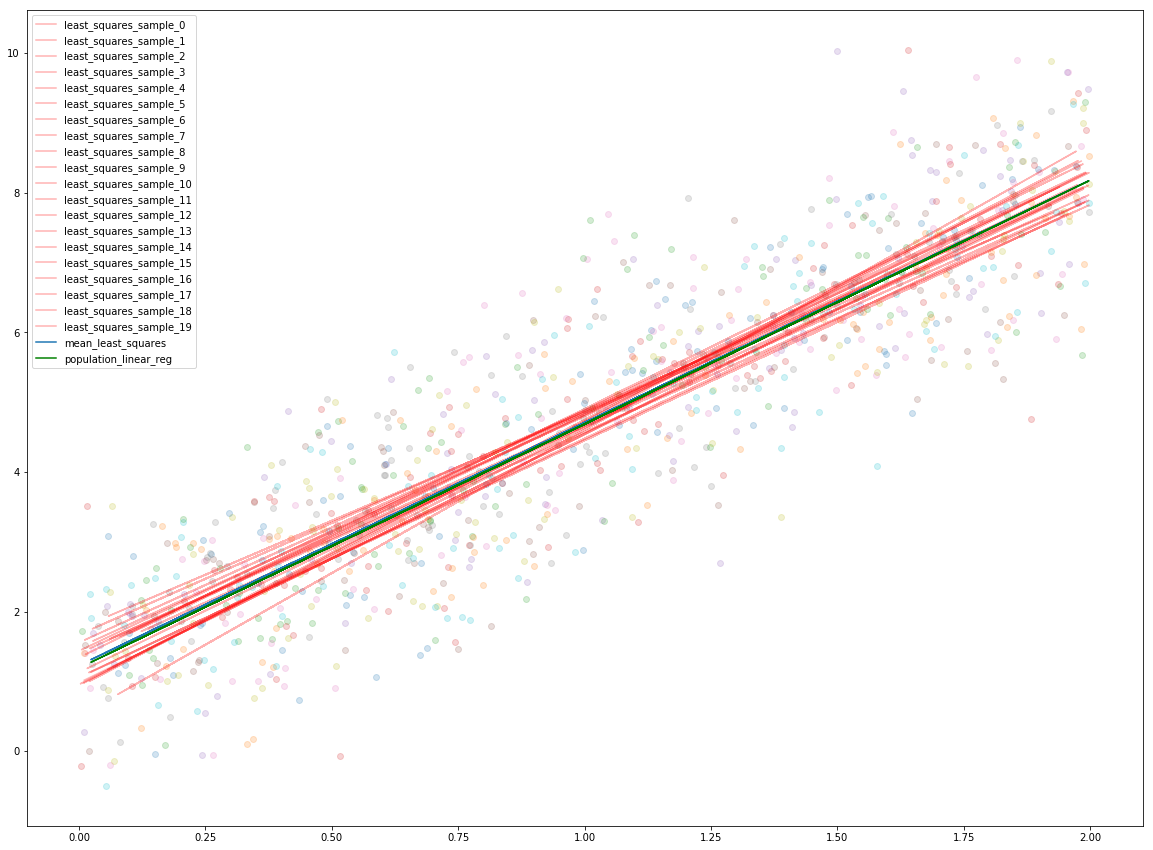

In [236]:
number_of_samples = 20
sample_size = 50
a_list = []
b_list = []
plt.figure(figsize=(20,15))

for sample in range(number_of_samples):
    #Simulate random error
    E = np.random.normal(loc = mean, scale = std, size = sample_size )
    #Simulate X data
    X = np.random.ranf(sample_size)*2
    #Calculate Y using X and E
    Y = a + b*X + E
    #build least squares line
    regr = linear_model.LinearRegression()
    X = X.reshape(-1, 1)
    regr.fit(X, Y)
    b_hat = regr.coef_[0]
    a_hat = regr.intercept_
    print("Sample ",sample, a_hat, b_hat)
    a_list.append(a_hat)
    b_list.append(b_hat)
    plt.scatter(X, Y, alpha=0.2)
    plt.plot(X, (a_hat + b_hat*X), '-r', label = 'least_squares_sample_'+str(sample), alpha=0.3)

a_hat_mean = np.mean(a_list)
b_hat_mean = np.mean(b_list)
print(a_hat_mean, b_hat_mean)
plt.plot(X, (a_hat_mean + b_hat_mean*X), label = 'mean_least_squares')
plt.plot(X, (a + b*X), '-g',label ='population_linear_reg')
plt.legend(loc='upper left')